<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открытие-и-изучение-файлов" data-toc-modified-id="Открытие-и-изучение-файлов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие и изучение файлов</a></span></li><li><span><a href="#Проверка-расчета-эффективности" data-toc-modified-id="Проверка-расчета-эффективности-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчета эффективности</a></span></li><li><span><a href="#Анализ-признаков-в-тестовой-сборке" data-toc-modified-id="Анализ-признаков-в-тестовой-сборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков в тестовой сборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-изменений-концентрации-металлов-на-различных-этапах" data-toc-modified-id="Анализ-изменений-концентрации-металлов-на-различных-этапах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ изменений концентрации металлов на различных этапах</a></span></li><li><span><a href="#Изучение-размера-гранул-тестовой-и-обучающей-сборки" data-toc-modified-id="Изучение-размера-гранул-тестовой-и-обучающей-сборки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение размера гранул тестовой и обучающей сборки</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Объявление-функции-для-расчета-sMAPE" data-toc-modified-id="Объявление-функции-для-расчета-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Объявление функции для расчета sMAPE</a></span></li><li><span><a href="#Обучение-и-оценка-качества-моделей" data-toc-modified-id="Обучение-и-оценка-качества-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение и оценка качества моделей</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для компании, разрабатввающей решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Для этого предоставлены данные с параметрами добычи и очистки. 

Оснонвые этапы исследования:
1. Подготовка данных;
2. Проведение исследовательского анализа данных;
3. Простроение и обучение модели.

## Подготовка данных

### Открытие и изучение файлов

Импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_validate  
om sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Прочитаем все таблицы, запишем их в переменные `train`, `test`, `full`. Одновременно с чтением изменим тип данных в ячейке с датой.

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv', parse_dates=['date'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14148 non-null  float64       
 2   final.output.concentrate_pb                         14148 non-null  float64       
 3   final.output.concentrate_sol                        13938 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14049 non-null  float64       
 8   final.

In [3]:
test = pd.read_csv('/datasets/gold_recovery_test_new.csv', parse_dates=['date'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5286 non-null   float64       
 2   primary_cleaner.input.depressant            5285 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5286 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

In [4]:
full = pd.read_csv('/datasets/gold_recovery_full_new.csv', parse_dates=['date'])
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19438 non-null  float64       
 2   final.output.concentrate_pb                         19438 non-null  float64       
 3   final.output.concentrate_sol                        19228 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19438 non-null  float64       
 7   final.output.tail_pb                                19338 non-null  float64       
 8   final.

### Проверка расчета эффективности

Для начала проверим расчет эффективности обогащения в обучающей выборке. Для этого объявим функцию.

In [5]:
def recovery (c, f, t):
    recovery = (c * (f - t) / (f * (c - t))) * 100
    return recovery

In [6]:
recovery_calculated = train[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']].dropna()
recovery_series = recovery(
    recovery_calculated['rougher.output.concentrate_au'], 
    recovery_calculated['rougher.input.feed_au'], 
    recovery_calculated['rougher.output.tail_au'])
display(recovery_series)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [7]:
display ('МАЕ = {:}'.format(mean_absolute_error(recovery_series, train['rougher.output.recovery'])))

'МАЕ = 9.73512347450521e-15'

**Вывод**

После проведенных расчетов можно сказать, что ошибка очень мала и можно утверждать что в данные в таблице верны.

### Анализ признаков в тестовой сборке

Пробежимся циклом по названиям столбцов в обучающей выборке и удалим из нее названия столбцов тестовой сборки.

In [8]:
changes = list(train.columns)
for i in list(test.columns):
    changes.remove(i)
display (changes)

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

**Вывод** 

В тестовой сборке отсутствуют данные, которые характеризуют выход продукта на разных стадиях обогащения, что и логично, ведь наша модель должна предсказывать коэффициент обогащения, который определяется из отсутствующих данных.

### Предобработка данных

Взглянем еще раз на обучающую выборку.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14148 non-null  float64       
 2   final.output.concentrate_pb                         14148 non-null  float64       
 3   final.output.concentrate_sol                        13938 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14049 non-null  float64       
 8   final.

Взглянем на сами данные.

In [10]:
train.sort_values('date')

date  final.output.concentrate_ag  \
0     2016-01-15 00:00:00                     6.055403   
1     2016-01-15 01:00:00                     6.029369   
2     2016-01-15 02:00:00                     6.055926   
3     2016-01-15 03:00:00                     6.047977   
4     2016-01-15 04:00:00                     6.148599   
...                   ...                          ...   
14144 2018-08-18 06:59:59                     3.224920   
14145 2018-08-18 07:59:59                     3.195978   
14146 2018-08-18 08:59:59                     3.109998   
14147 2018-08-18 09:59:59                     3.367241   
14148 2018-08-18 10:59:59                     3.598375   

       final.output.concentrate_pb  final.output.concentrate_sol  \
0                         9.889648                      5.507324   
1                         9.968944                      5.257781   
2                        10.213995                      5.383759   
3                         9.977019                      4.858634   
4                        10.142511                      4.939416   
...                            ...                           ...   
14144                    11.356233                      6.803482   
14145                    11.349355                      6.862249   
14146                    11.434366                      6.886013   
14147                    11.625587                      6.799433   
14148                    11.737832                      6.717509   

       final.output.concentrate_au  final.output.recovery  \
0                        42.192020              70.541216   
1                        42.701629              69.266198   
2                        42.657501              68.116445   
3                        42.689819              68.347543   
4                        42.774141              66.927016   
...                            ...                    ...   
14144                    46.713954              73.755150   
14145                    46.866780              69.049291   
14146                    46.795691              67.002189   
14147                    46.408188              65.523246   
14148                    46.299438              70.281454   

       final.output.tail_ag  final.output.tail_pb  final.output.tail_sol  \
0                 10.411962              0.895447              16.904297   
1                 10.462676              0.927452              16.634514   
2                 10.507046              0.953716              16.208849   
3                 10.422762              0.883763              16.532835   
4                 10.360302              0.792826              16.525686   
...                     ...                   ...                    ...   
14144              8.769645              3.141541              10.403181   
14145              8.897321              3.130493              10.549470   
14146              8.529606              2.911418              11.115147   
14147              8.777171              2.819214              10.463847   
14148              8.406690              2.517518              10.652193   

       final.output.tail_au  ...  secondary_cleaner.state.floatbank4_a_air  \
0                  2.143149  ...                                 14.016835   
1                  2.224930  ...                                 13.992281   
2                  2.257889  ...                                 14.015015   
3                  2.146849  ...                                 14.036510   
4                  2.055292  ...                                 14.027298   
...                     ...  ...                                       ...   
14144              1.529220  ...                                 23.031497   
14145              1.612542  ...                                 22.960095   
14146              1.596616  ...                                 23.015718   
14147              1.602879  ...                                 23.024963   
141

In [11]:
pd.set_option('max_rows', None)
display((train.isna().sum()))
pd.reset_option('max_rows')

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 2

**Вывод**

Таким образом, видно, что в данных очень много пропусков. Взглянув на данные, отсортированные по дате, видим что в один день данные очень похожи друг на друга. Можем заполнить пропуска в данных методом `ffill`.

In [12]:
train = train.fillna(method='ffill')
pd.set_option('max_rows', None)
display((train.isna().sum()))
pd.reset_option('max_rows')

date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

Аналогичным образом обработаем пропуски в `full` и `test`.

In [13]:
full = full.fillna(method='ffill')
test = test.fillna(method='ffill')

In [14]:
pd.set_option('max_rows', None)
display((full.isna().sum()))
display((test.isna().sum()))
pd.reset_option('max_rows')

date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Проверим датасет на наличие дубликатов.

In [15]:
train.duplicated().sum()

0

Взглянем на выбросы.

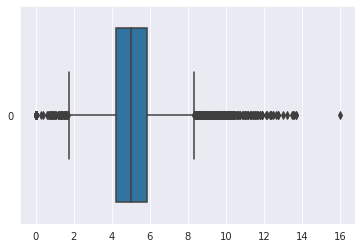

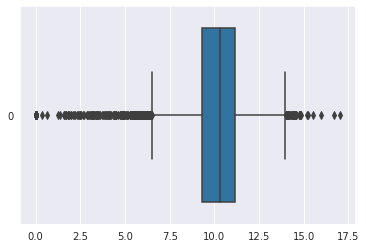

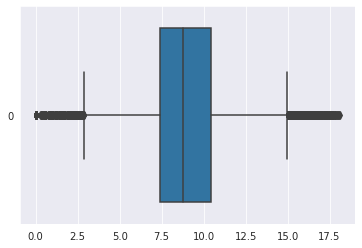

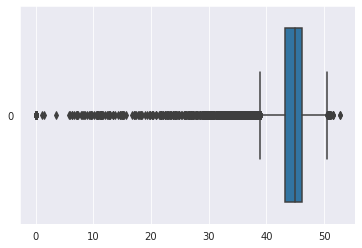

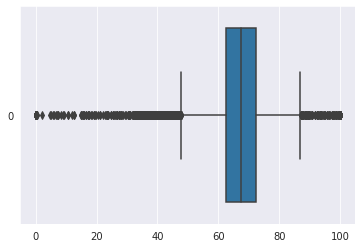

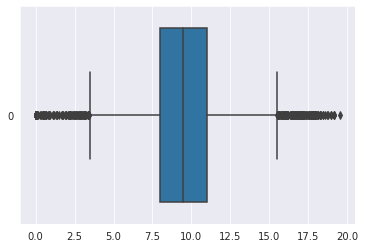

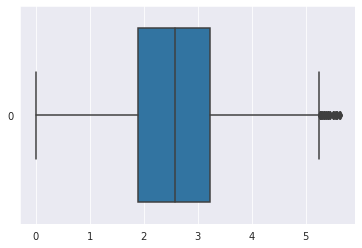

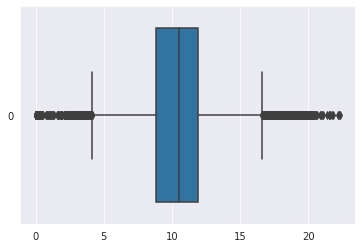

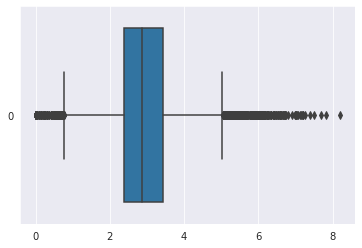

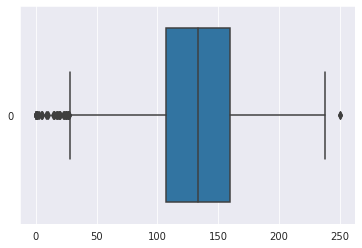

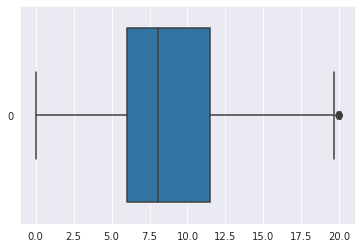

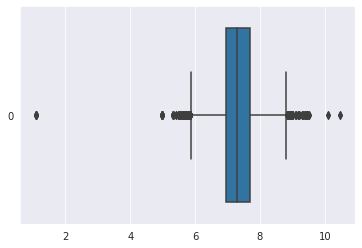

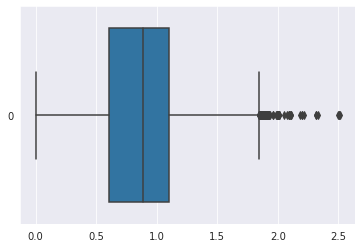

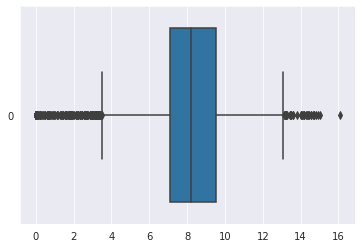

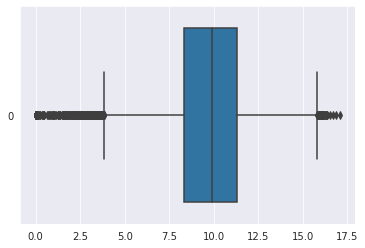

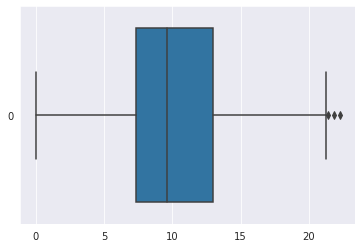

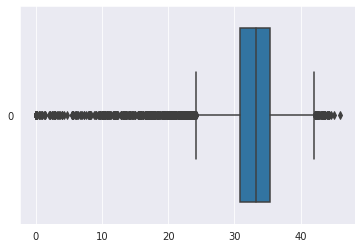

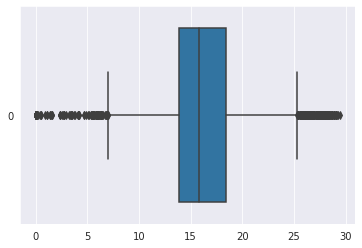

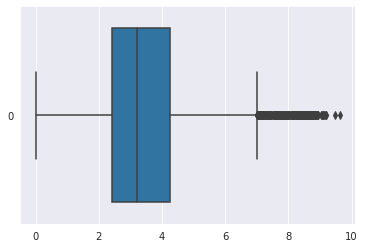

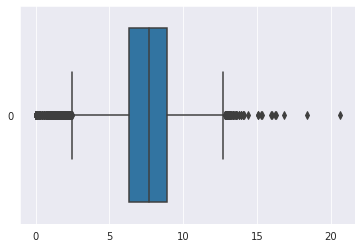

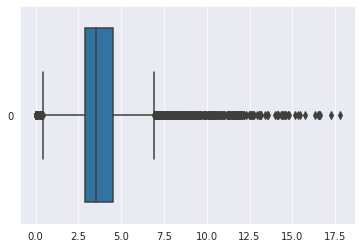

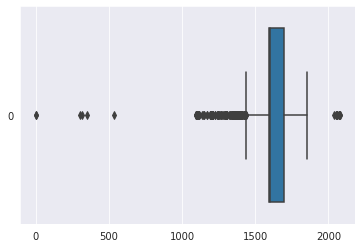

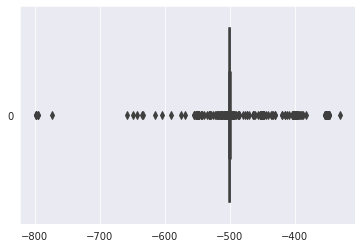

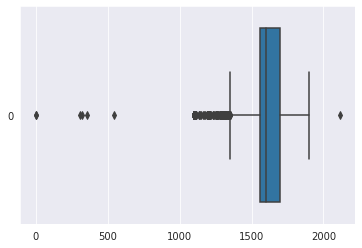

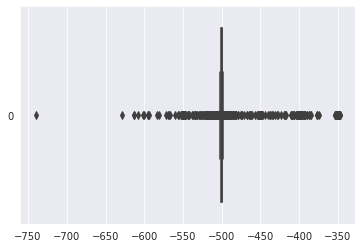

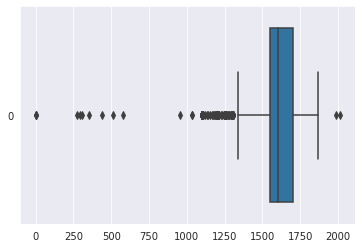

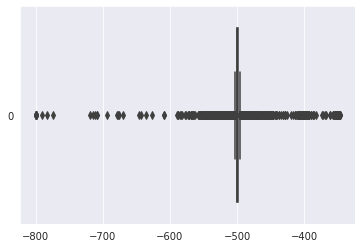

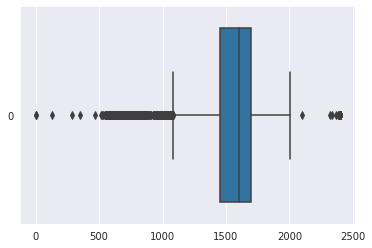

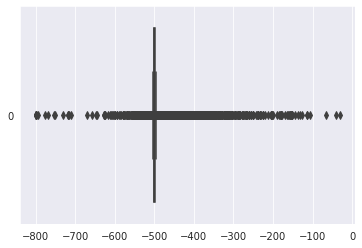

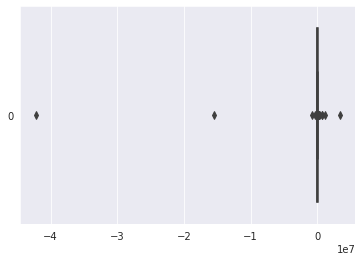

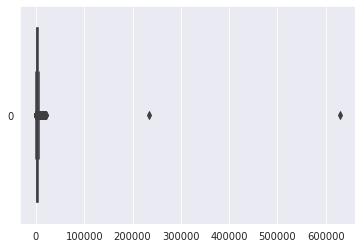

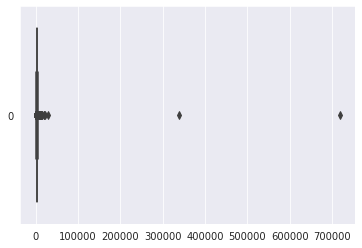

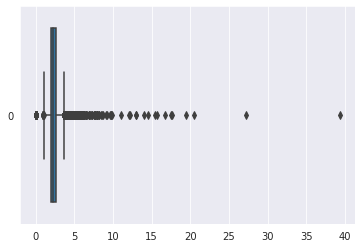

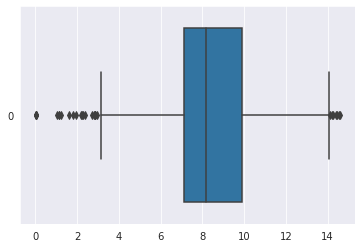

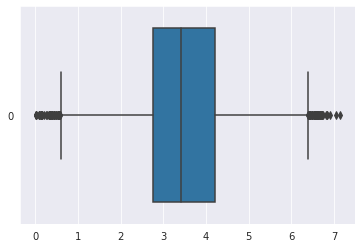

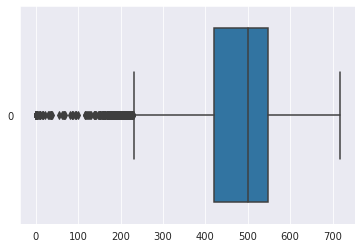

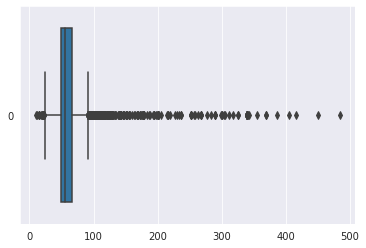

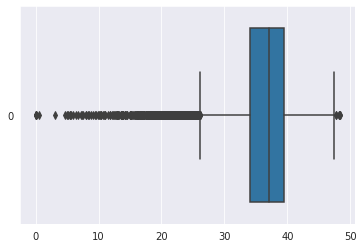

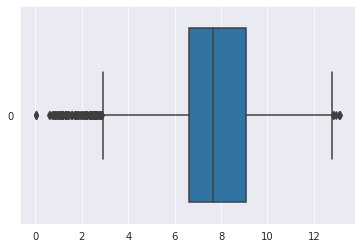

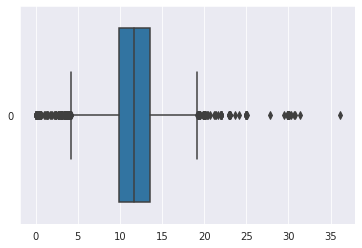

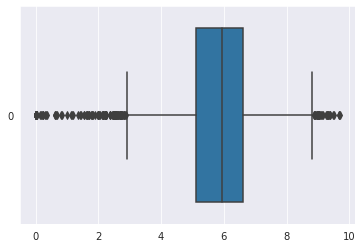

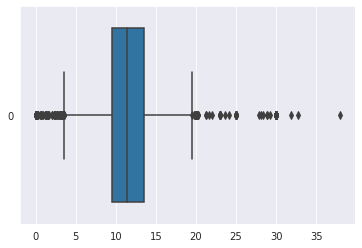

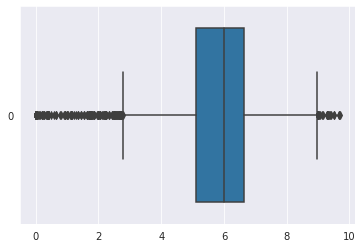

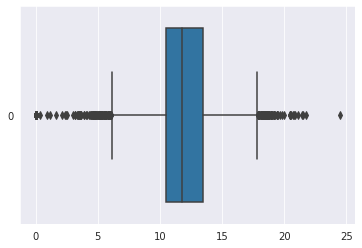

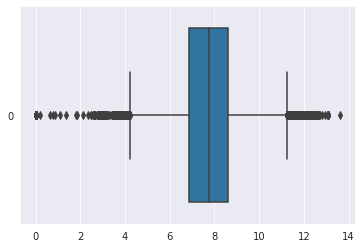

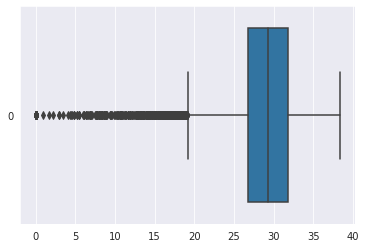

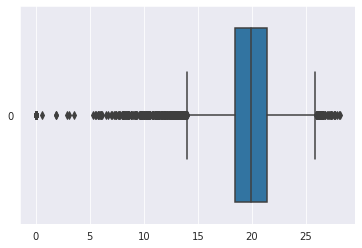

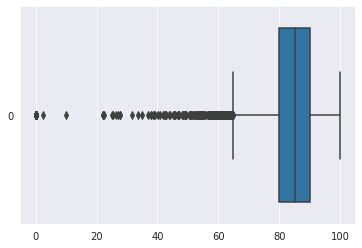

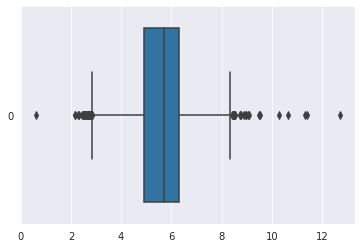

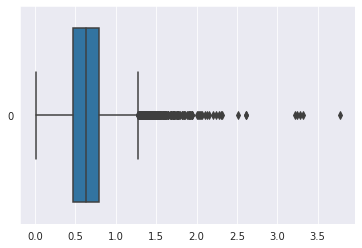

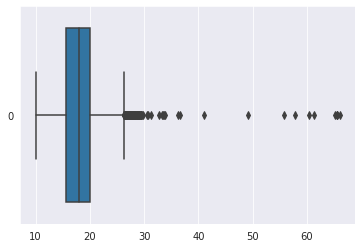

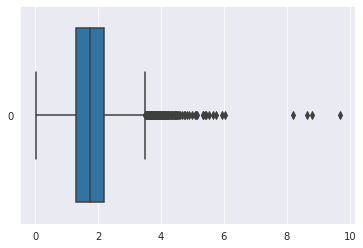

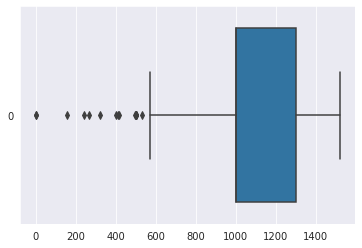

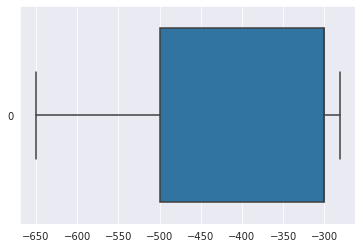

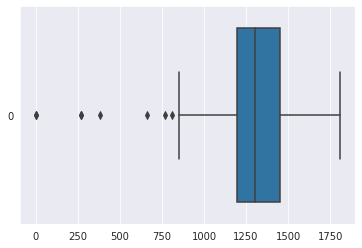

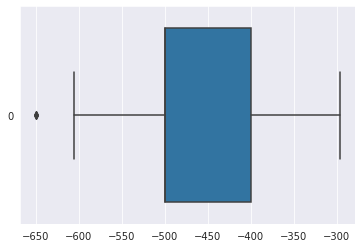

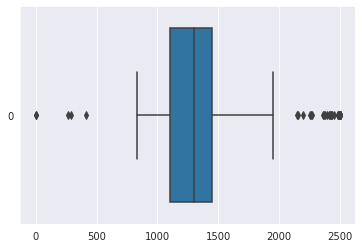

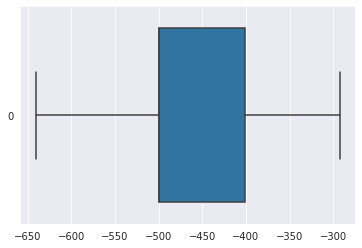

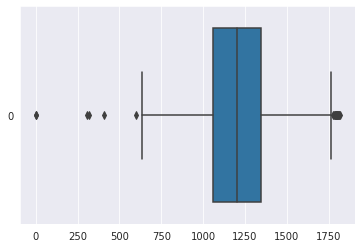

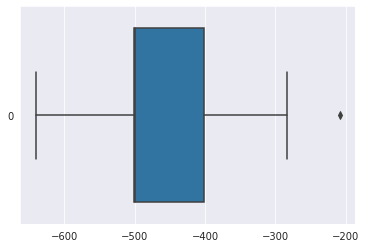

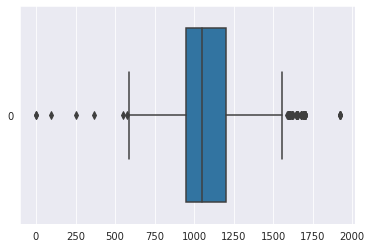

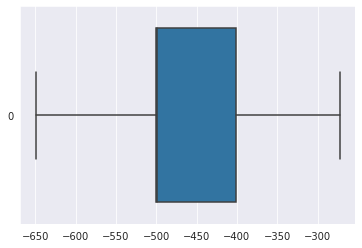

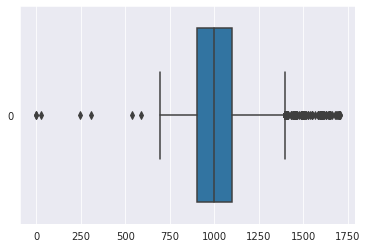

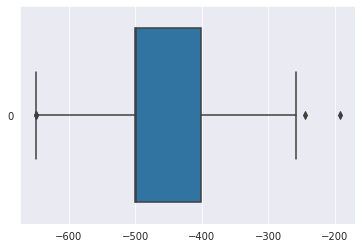

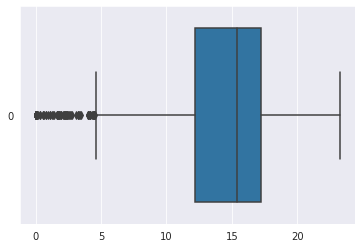

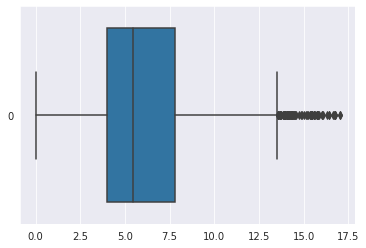

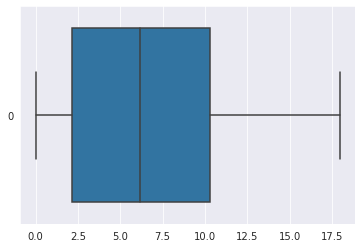

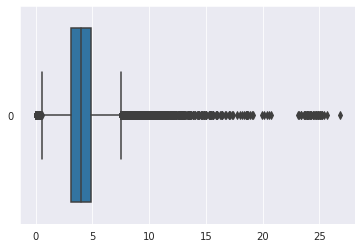

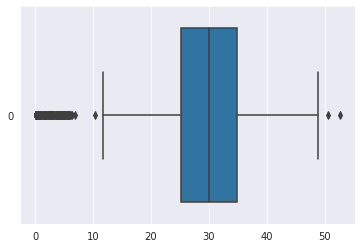

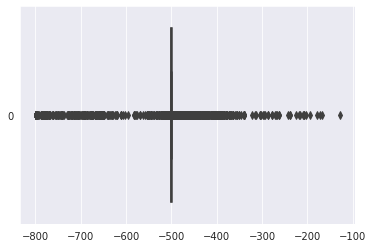

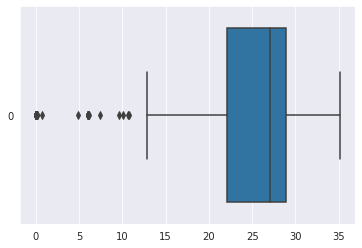

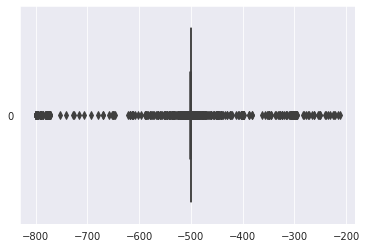

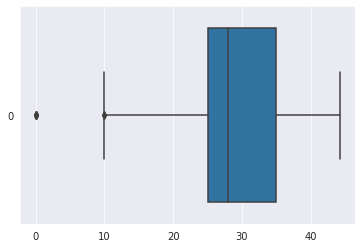

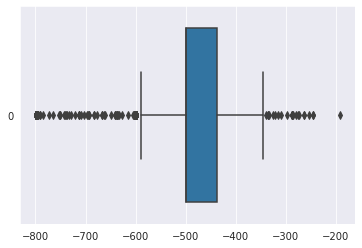

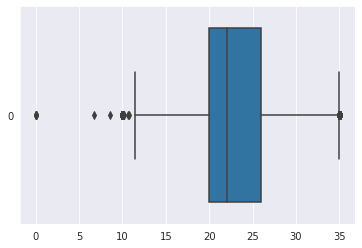

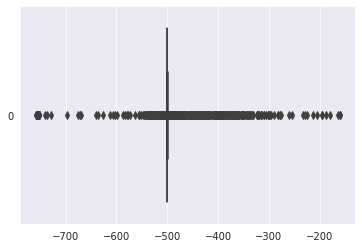

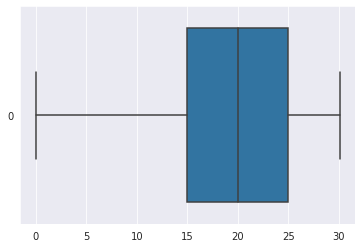

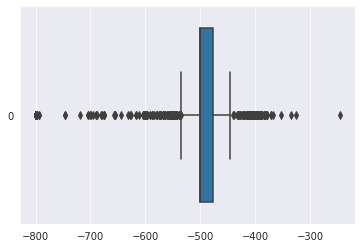

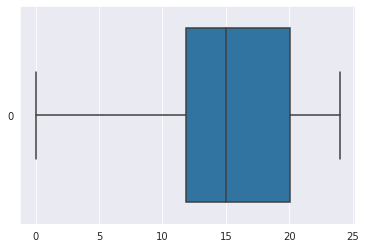

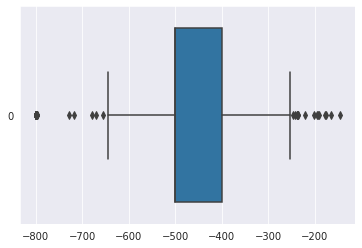

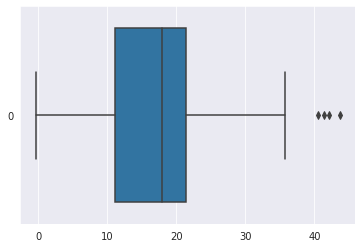

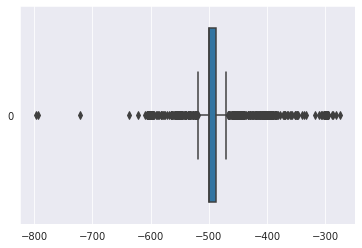

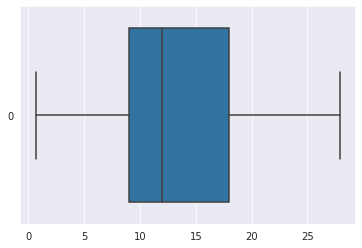

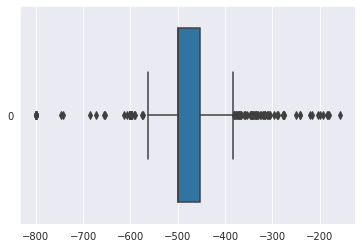

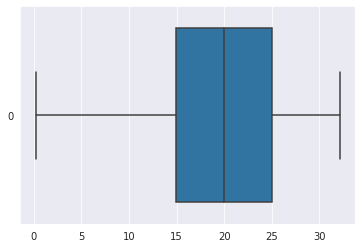

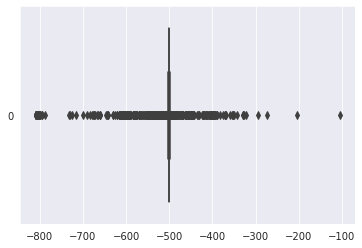

In [16]:
train_columns = list(train.columns)

sns.set_style('darkgrid')
fig, ax = plt.subplots()
    
for i in range(1, len(train_columns)):
    sns.boxplot(data=train[train_columns[i]], orient='h')
    
    plt.show()

Выбросы имеются почти в каждом признаке. Найдем их общее количество.

In [17]:
outliers = []
count = 0
index_out = []
for j in train_columns:

    lower_mustache = train[j].quantile(0.25) - 1.5 * (train[j].quantile(0.75) - train[j].quantile(0.25))
    upper_mustache = train[j].quantile(0.75) + 1.5 * (train[j].quantile(0.75) - train[j].quantile(0.25))
    sum_count = len(train.query('@train[@j] < @lower_mustache | @train[@j] > @upper_mustache').index)
    percent = sum_count / len(train[j])
    index_out += list(
        train.query('@train[@j] < @lower_mustache | @train[@j] > @upper_mustache').index)
    outliers.append([])
    outliers[count].append(j) 
    outliers[count].append(lower_mustache)
    outliers[count].append(upper_mustache)
    outliers[count].append(sum_count)
    outliers[count].append(percent)
    count += 1        
columns = ['features', 'lower_mustache', 'upper_mustache', 'sum_count', 'percent']
data_outliers = pd.DataFrame(outliers, columns=columns)
index_out = pd.Series(index_out, copy=False).drop_duplicates()
percent_of_emissions = (len(index_out) / len(train)) * 100
display(f'Процент выбросов в данных: {percent_of_emissions:.3f}%')

'Процент выбросов в данных: 85.349%'

Выбросов очень много. Предлагаю оставить как есть, так удаление приведет к существенному сокращению данных.

На данном этапе извлечем целевые признаки для проверки качества моделей из полного датасета и посмотрим на распределение.

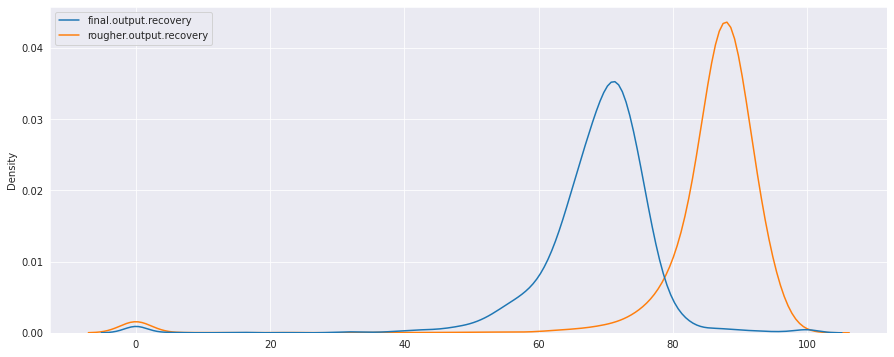

In [18]:
target = full.query('date in @test.date')
target = target[['final.output.recovery', 'rougher.output.recovery']]

fig, ax = plt.subplots()

ax = sns.kdeplot(data=target, legend=True)

fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle('', fontsize = 15)

plt.show()

Подозрительные нулевые значения в распределении. Посмотрим на распределение целевых значений в обучающей выборке.

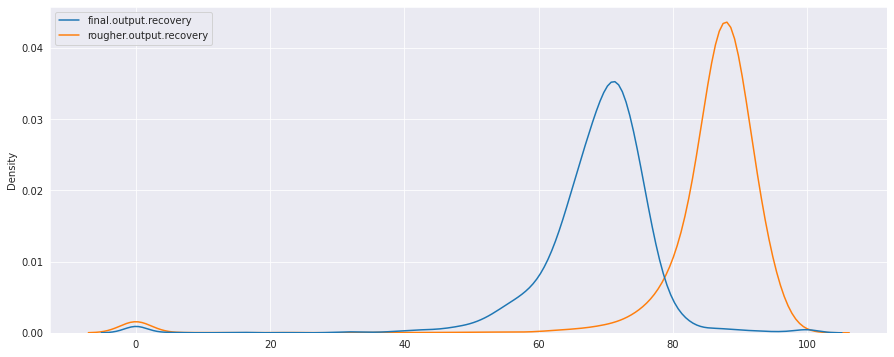

In [19]:
target_train = train[['final.output.recovery', 'rougher.output.recovery']]

fig, ax = plt.subplots()

ax = sns.kdeplot(data=target, legend=True)

fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle('', fontsize = 15)

plt.show()

Тут также видим нулевые значения. Посмотрим на них.

In [20]:
display(
    'Количество строк с нулевыми значениями на полной выборке: {:}'
    .format(len(full[full['final.output.recovery'] == 0])))
display(
    'Количество строк с нулевыми значениями на обучающей выборке: {:}'
    .format(len(train[train['final.output.recovery'] == 0])))

'Количество строк с нулевыми значениями на полной выборке: 98'

'Количество строк с нулевыми значениями на обучающей выборке: 58'

In [21]:
display(
    'Количество строк с нулевыми значениями на полной выборке: {:}'
    .format(len(full[full['rougher.output.recovery'] == 0])))
display(
    'Количество строк с нулевыми значениями на обучающей выборке: {:}'
    .format(len(train[train['rougher.output.recovery'] == 0])))

'Количество строк с нулевыми значениями на полной выборке: 394'

'Количество строк с нулевыми значениями на обучающей выборке: 297'

In [22]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
display(full[full['rougher.output.recovery'] == 0])
pd.reset_option('max_rows')
pd.reset_option('max_columns')

date  final.output.concentrate_ag  \
45    2016-01-16 21:00:00                     4.566664   
46    2016-01-16 22:00:00                     4.577832   
47    2016-01-16 23:00:00                     4.591462   
48    2016-01-17 00:00:00                     5.296830   
49    2016-01-17 02:00:00                     8.162896   
50    2016-01-17 03:00:00                     5.759800   
51    2016-01-17 04:00:00                     5.807253   
759   2016-02-18 20:00:00                     8.478624   
1243  2016-03-13 12:00:00                     0.371783   
1682  2016-04-09 17:00:00                     0.000000   
1696  2016-04-10 09:00:00                     6.215511   
1697  2016-04-10 10:00:00                     5.720409   
1698  2016-04-10 11:00:00                     5.328976   
1966  2016-04-23 15:59:59                     8.323495   
2082  2016-05-04 14:59:59                     7.350942   
2083  2016-05-04 15:59:59                     7.159796   
2084  2016-05-04 16:59:59                     6.416469   
2085  2016-05-04 17:59:59                     6.075132   
2829  2016-06-06 18:59:59                     4.437167   
4001  2016-08-01 09:59:59                     4.045359   
4002  2016-08-01 10:59:59                     3.697121   
4003  2016-08-01 11:59:59                     3.586540   
4004  2016-08-01 12:59:59                     3.842972   
4005  2016-08-01 13:59:59                     4.251957   
4006  2016-08-01 14:59:59                     4.403698   
4007  2016-08-01 15:59:59                     5.114479   
4712  2016-09-02 06:59:59                     0.000000   
4767  2016-09-04 17:59:59                     3.508868   
4768  2016-09-04 18:59:59                     3.567873   
4769  2016-09-04 19:59:59                     3.599473   
4770  2016-09-04 20:59:59                     3.505033   
4771  2016-09-04 21:59:59                     3.412288   
4772  2016-09-04 22:59:59                     3.336157   
4773  2016-09-04 23:59:59                     3.428486   
4775  2016-09-05 01:59:59                     3.683800   
4776  2016-09-05 02:59:59                     3.521916   
4777  2016-09-05 03:59:59                     3.564722   
4778  2016-09-05 04:59:59                     3.380196   
4779  2016-09-05 05:59:59                     3.269141   
4780  2016-09-05 06:59:59                     3.214857   
4781  2016-09-05 07:59:59                     3.243084   
4782  2016-09-05 08:59:59                     3.177588   
4783  2016-09-05 09:59:59                     3.339855   
4784  2016-09-05 10:59:59                     3.419391   
4785  2016-09-05 11:59:59                     3.882269   
4786  2016-09-05 12:59:59                     4.877968   
4787  2016-09-05 13:59:59                     4.888557   
4788  2016-09-05 14:59:59                     4.817185   
4789  2016-09-05 15:59:59                     4.817169   
4790  2016-09-05 16:59:59                     4.648027   
4791  2016-09-05 17:59:59                     4.413559   
4792  2016-09-05 18:59:59                     4.108534   
4793  2016-09-05 19:59:59                     3.974435   
4794  2016-09-05 20:59:59                     4.162599   
4795  2016-09-05 21:59:59                     4.398276   
4796  2016-09-05 22:59:59                     5.002770   
4797  2016-09-05 23:59:59                     5.301487   
4798  2016-09-06 00:59:59                     5.118714   
4799  2016-09-06 01:59:59                     5.459199   
4800  2016-09-06 02:59:59                     5.438415   
4801  2016-09-06 03:59:59                     5.100183   
4802  2016-09-06 04:59:59                     4.846138   
4803  2016-09-06 05:59:59                     4.527945   
4804  2016-09-06 06:59:59                     4.323259   
4805  2016-09-06 07:59:59                     4.086156   
4806  2016-09-06 08:59:59                     3.670251   
4807  2016-09-06 09:59:59                     3.488771   
4808  2016-09-06 10:59:59                     4.225838   
4809  2016-09-06 11

Предлагаю удалить эти значения, так как проанализировав значения видим, что нет данных по продукту для всего этапа - есть данные хвостов, но нет данных о продукте и нет эффективности. Это относится к обоим этапам - грубой очистке и финалной очистке. После удаления обновим `test`.

In [23]:
index_drop = full.query('`rougher.output.recovery` == 0 or `final.output.recovery` == 0').index
index_drop

full = full.drop(index=index_drop, axis=0)
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18949 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                18949 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         18949 non-null  float64       
 2   final.output.concentrate_pb                         18949 non-null  float64       
 3   final.output.concentrate_sol                        18949 non-null  float64       
 4   final.output.concentrate_au                         18949 non-null  float64       
 5   final.output.recovery                               18949 non-null  float64       
 6   final.output.tail_ag                                18949 non-null  float64       
 7   final.output.tail_pb                                18949 non-null  float64       
 8   final.

In [24]:
index_drop = train.query('`rougher.output.recovery` == 0 or `final.output.recovery` == 0').index
index_drop

train = train.drop(index=index_drop, axis=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13795 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                13795 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         13795 non-null  float64       
 2   final.output.concentrate_pb                         13795 non-null  float64       
 3   final.output.concentrate_sol                        13795 non-null  float64       
 4   final.output.concentrate_au                         13795 non-null  float64       
 5   final.output.recovery                               13795 non-null  float64       
 6   final.output.tail_ag                                13795 non-null  float64       
 7   final.output.tail_pb                                13795 non-null  float64       
 8   final.

In [25]:
test = full.query('date in @test.date').drop(columns=changes, axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5154 entries, 4682 to 15059
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5154 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5154 non-null   float64       
 2   primary_cleaner.input.depressant            5154 non-null   float64       
 3   primary_cleaner.input.feed_size             5154 non-null   float64       
 4   primary_cleaner.input.xanthate              5154 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5154 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5154 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5154 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5154 non-null   float64       
 9   prim

In [26]:
index_drop = list(full.index)
for i in list(test.index):
    index_drop.remove(i)

test_target = full[['final.output.recovery', 'rougher.output.recovery']].drop(
    index=index_drop, axis=0)
test_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5154 entries, 4682 to 15059
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   final.output.recovery    5154 non-null   float64
 1   rougher.output.recovery  5154 non-null   float64
dtypes: float64(2)
memory usage: 120.8 KB


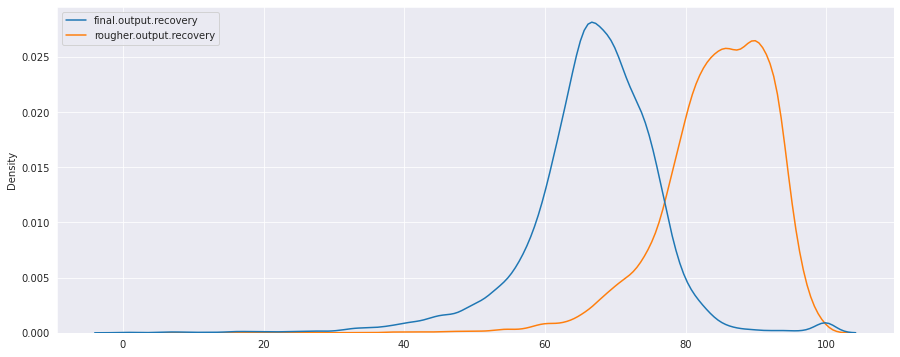

In [27]:
fig, ax = plt.subplots()

ax = sns.kdeplot(data=train[['final.output.recovery', 'rougher.output.recovery']], legend=True)

fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle('', fontsize = 15)

plt.show()

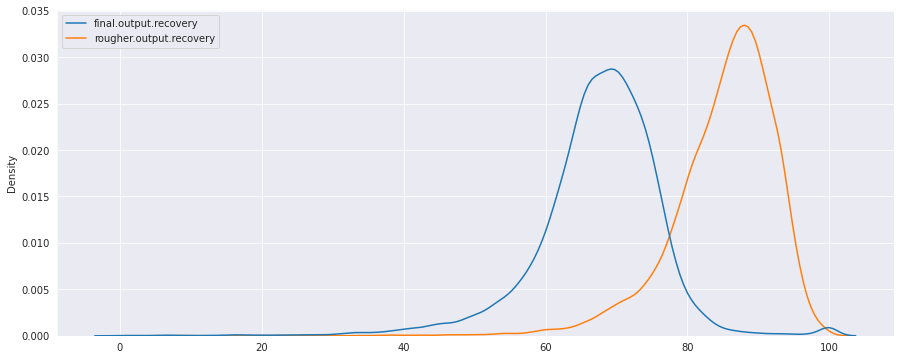

In [28]:
fig, ax = plt.subplots()

ax = sns.kdeplot(data=full[['final.output.recovery', 'rougher.output.recovery']], legend=True)

fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle('', fontsize = 15)

plt.show()

На этом предобработку завершим. Итого мы проверили на наличие дубликатов, разобрались с пропусками, подготовили целевой признак для обучения моделей.

<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить аномалии около нуля – хорошая идея!
</div>

## Анализ данных

### Анализ изменений концентрации металлов на различных этапах

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Для этого соберем в таблицу все наобходимые данные и построим гисторгамму.

In [29]:
dict_mean_output = {'metall':[], 'mean':[], 'stage':[]}

dict_mean_output['metall'].extend(['Aurum', 'Argenti', 'Plumbum'])
dict_mean_output['mean'].extend(
    [full['rougher.input.feed_au'].mean(),
     full['rougher.input.feed_ag'].mean(),
     full['rougher.input.feed_pb'].mean()
    ])
dict_mean_output['stage'].extend(['input', 'input', 'input'])

dict_mean_output['metall'].extend(['Aurum', 'Argenti', 'Plumbum'])
dict_mean_output['mean'].extend(
    [full['rougher.output.concentrate_au'].mean(),
     full['rougher.output.concentrate_ag'].mean(),
     full['rougher.output.concentrate_pb'].mean()
    ])
dict_mean_output['stage'].extend(['rougher', 'rougher', 'rougher'])

dict_mean_output['metall'].extend(['Aurum', 'Argenti', 'Plumbum'])
dict_mean_output['mean'].extend(
    [full['primary_cleaner.output.concentrate_au'].mean(),
     full['primary_cleaner.output.concentrate_ag'].mean(),
     full['primary_cleaner.output.concentrate_pb'].mean()
    ])
dict_mean_output['stage'].extend(['primary_cleaner', 'primary_cleaner', 'primary_cleaner'])


dict_mean_output['metall'].extend(['Aurum', 'Argenti', 'Plumbum'])
dict_mean_output['mean'].extend(
    [full['final.output.concentrate_au'].mean(),
     full['final.output.concentrate_ag'].mean(),
     full['final.output.concentrate_pb'].mean()
    ])
dict_mean_output['stage'].extend(['final', 'final', 'final'])

table_mean_output = pd.DataFrame(dict_mean_output, columns=['metall', 'mean', 'stage'])
table_mean_output

metall       mean            stage
0     Aurum   8.258139            input
1   Argenti   8.788469            input
2   Plumbum   3.581617            input
3     Aurum  20.177817          rougher
4   Argenti  12.243959          rougher
5   Plumbum   7.763225          rougher
6     Aurum  32.101133  primary_cleaner
7   Argenti   8.459371  primary_cleaner
8   Plumbum   9.805949  primary_cleaner
9     Aurum  44.280284            final
10  Argenti   5.200005            final
11  Plumbum  10.034090            final

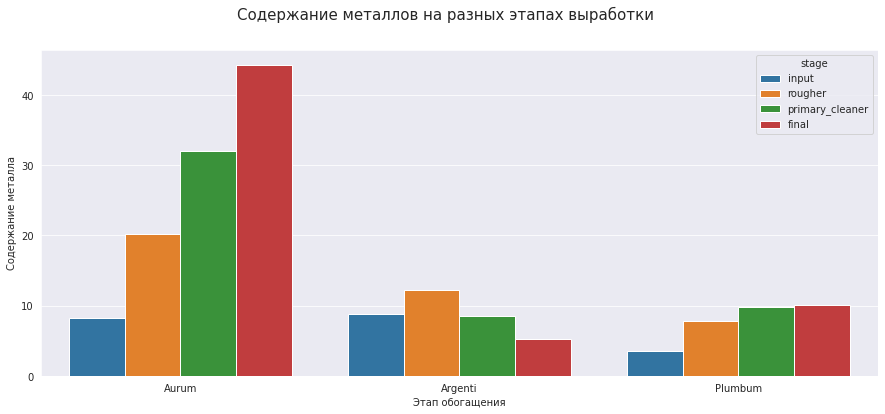

In [30]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()

sns.barplot(x='metall', y='mean', data=table_mean_output, hue='stage', ci = None)

fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle('Содержание металлов на разных этапах выработки', fontsize = 15)

ax.set_xlabel('Этап обогащения')
ax.set_ylabel('Содержание металла')

plt.show()

**Вывод**

Рассмотрев концентрацию веществ на всех этапах очистки мы видим, что концентрация золота увеличилась с 9% до 43%, серебро снизилось до 5%, а содержание свинца выросло в итоговом продукте не сильно, и составило на выходе 10 %.

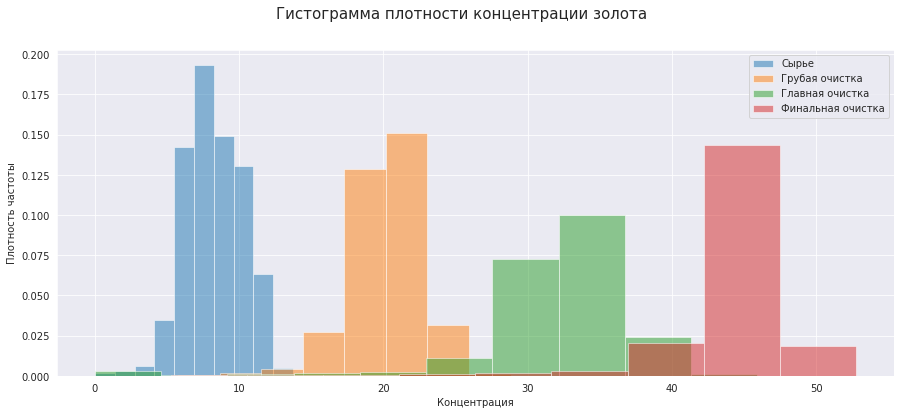

In [31]:
fig, ax = plt.subplots()

plt.hist(full[
    'rougher.input.feed_au'], 
    density=True,
    label='Сырье',
    alpha=0.5
)

plt.hist(full[
    'rougher.output.concentrate_au'], 
    density=True,
    label='Грубая очистка',
    alpha=0.5
)

plt.hist(full[
    'primary_cleaner.output.concentrate_au'], 
    density=True,
    label='Главная очистка',
    alpha=0.5
)

plt.hist(full[
    'final.output.concentrate_au'], 
    density=True,
    label='Финальная очистка',
    alpha=0.5
)

fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle('Гистограмма плотности концентрации золота', fontsize = 15)

ax.set_xlabel('Концентрация')
ax.set_ylabel('Плотность частоты')

plt.legend()
plt.show()

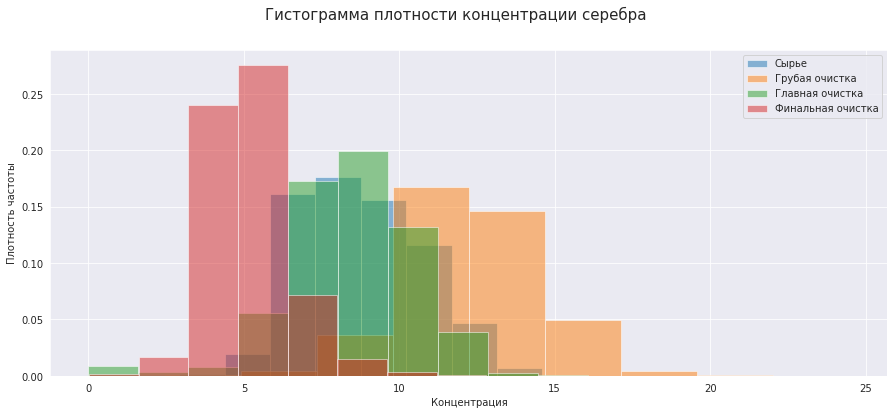

In [32]:
fig, ax = plt.subplots()

plt.hist(full[
    'rougher.input.feed_ag'], 
    density=True,
    label='Сырье',
    alpha=0.5
)

plt.hist(full[
    'rougher.output.concentrate_ag'], 
    density=True,
    label='Грубая очистка',
    alpha=0.5
)

plt.hist(full[
    'primary_cleaner.output.concentrate_ag'], 
    density=True,
    label='Главная очистка',
    alpha=0.5
)

plt.hist(full[
    'final.output.concentrate_ag'], 
    density=True,
    label='Финальная очистка',
    alpha=0.5
)

fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle('Гистограмма плотности концентрации серебра', fontsize = 15)

ax.set_xlabel('Концентрация')
ax.set_ylabel('Плотность частоты')

plt.legend()
plt.show()

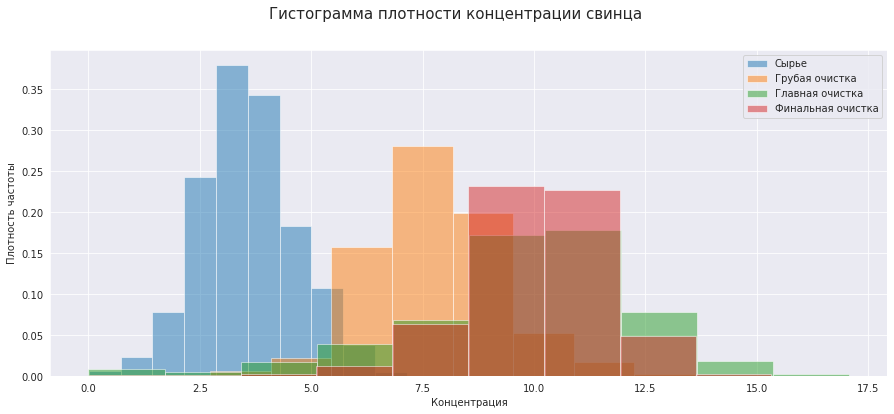

In [33]:
fig, ax = plt.subplots()

plt.hist(full[
    'rougher.input.feed_pb'], 
    density=True,
    label='Сырье',
    alpha=0.5
)

plt.hist(full[
    'rougher.output.concentrate_pb'], 
    density=True,
    label='Грубая очистка',
    alpha=0.5
)

plt.hist(full[
    'primary_cleaner.output.concentrate_pb'], 
    density=True,
    label='Главная очистка',
    alpha=0.5
)

plt.hist(full[
    'final.output.concentrate_pb'], 
    density=True,
    label='Финальная очистка',
    alpha=0.5
)

fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle('Гистограмма плотности концентрации свинца', fontsize = 15)

ax.set_xlabel('Концентрация')
ax.set_ylabel('Плотность частоты')

plt.legend()
plt.show()

По гистограмме плотностей видно,что золото планомерно увеличивается с каждым этапов очистки, серебро - находится в районе 7 - 8 процентов и лишь на финальном этапе снижается до 5, свинец - увеличивается с 3 процентов до 10.

### Изучение размера гранул тестовой и обучающей сборки

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной. Для начала посмотрим на главную очистку, потом на грубую.

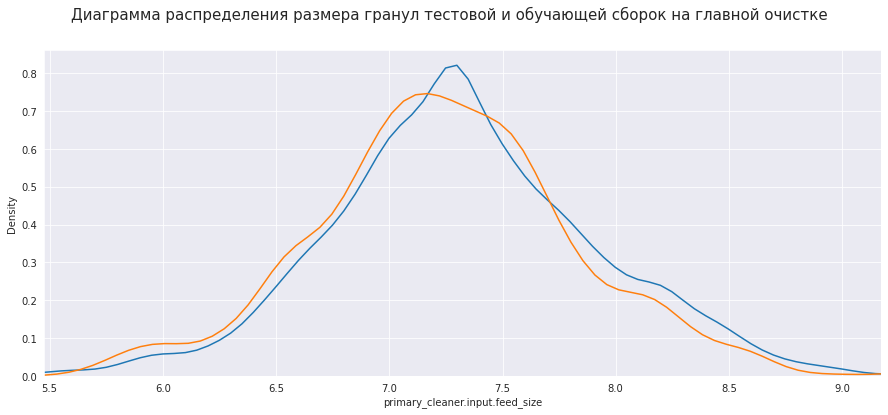

In [34]:
# Огрничим наш график тремя сигмами.
sigma = np.std(train['primary_cleaner.input.feed_size'], ddof=1)
mu = np.mean(train['primary_cleaner.input.feed_size'])
# Наш график распределения
fig, ax = plt.subplots()

sns.kdeplot(data=train['primary_cleaner.input.feed_size'])
sns.kdeplot(data=test['primary_cleaner.input.feed_size'])

fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle('Диаграмма распределения размера гранул тестовой и обучающей сборок на главной очистке', fontsize = 15)

plt.xlim((mu - 3 * sigma, mu + 3 * sigma))

plt.show()

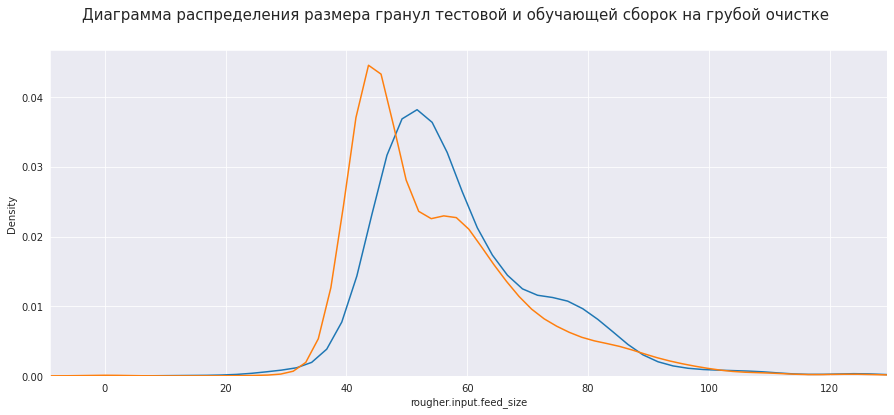

In [35]:
fig, ax = plt.subplots()

sigma = np.std(train['rougher.input.feed_size'], ddof=1)
mu = np.mean(train['rougher.input.feed_size'])

sns.kdeplot(data=train['rougher.input.feed_size'])
sns.kdeplot(data=test['rougher.input.feed_size'])

fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle('Диаграмма распределения размера гранул тестовой и обучающей сборок на грубой очистке', fontsize = 15)

plt.xlim((mu - 3 * sigma, mu + 3 * sigma))

plt.show()

**Вывод**

Диаграмма распределения размера гранул на главной очистке похожи. На грубой очистке есть небольшое смещение, но большая часть площади распределения под кривой пересекаются. На данный момент оставим как есть, посмотрим что покажут наши модели на следующем этапе.

### Исследование суммарной концентрации всех веществ на разных стадиях

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

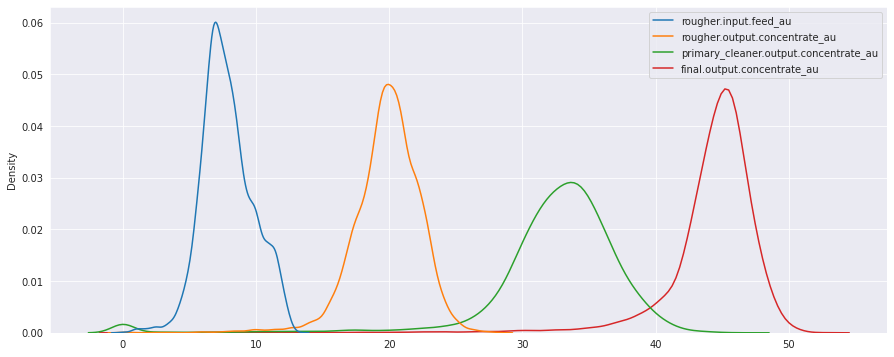

In [36]:
fig, ax = plt.subplots()

data_1 = train[[
    'rougher.input.feed_au',
    'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_au',
    'final.output.concentrate_au'
]]

ax = sns.kdeplot(data=data_1, legend=True)

fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle('', fontsize = 15)

plt.show()

Распределение концентрации содержания золота на разных этапах очистки показывает, что на каждом этапе виден устойчивый рост концентрации, что логично.

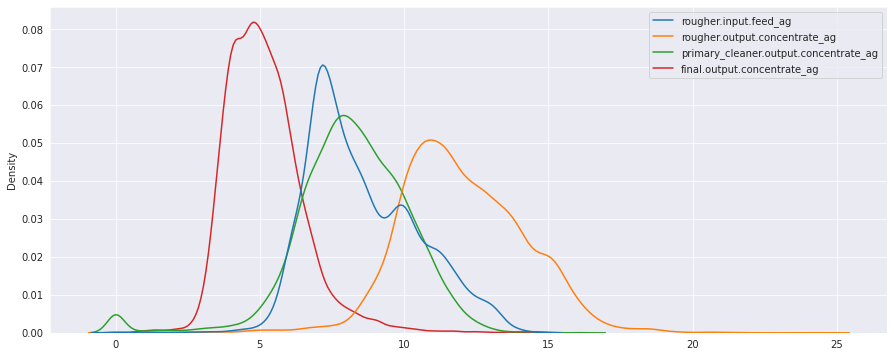

In [37]:
fig, ax = plt.subplots()

data_2 = train[[
    'rougher.input.feed_ag',
    'rougher.output.concentrate_ag',
    'primary_cleaner.output.concentrate_ag',
    'final.output.concentrate_ag'
]]

ax = sns.kdeplot(data=data_2, legend=True)

fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle('', fontsize = 15)

plt.show()

С серебром интереснее. После грубой очистки в исходном сырье концентрация увеличивается, почти в два раза, до 12. Потом, на этапах главной очисти и финальной очистки собержание равномерно снижается до 5% в готовом продукте.

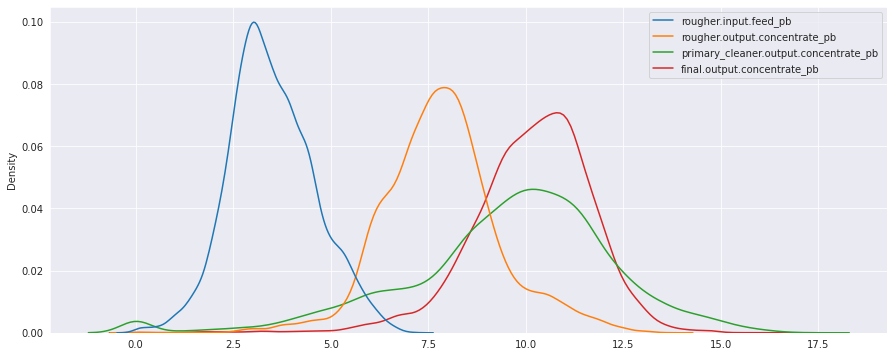

In [38]:
fig, ax = plt.subplots()

data_3 = train[[
    'rougher.input.feed_pb',
    'rougher.output.concentrate_pb',
    'primary_cleaner.output.concentrate_pb',
    'final.output.concentrate_pb'
]]

ax = sns.kdeplot(data=data_3, legend=True)

fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle('', fontsize = 15)

plt.show()

Содержание свинца немного увеличивается на каждом этапе. Интересно ведет себя содержание свинца после главной очистки и финальной - величина содержания не меняется.

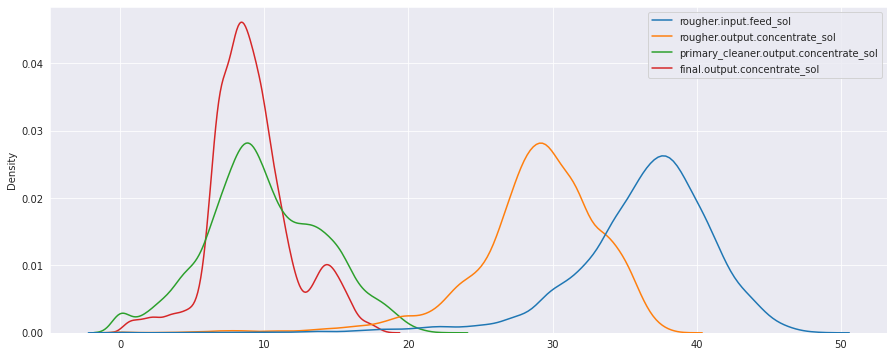

In [39]:
fig, ax = plt.subplots()

data_4 = train[[
    'rougher.input.feed_sol',
    'rougher.output.concentrate_sol',
    'primary_cleaner.output.concentrate_sol',
    'final.output.concentrate_sol'
]]

ax = sns.kdeplot(data=data_4, legend=True)

fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle('', fontsize = 15)

plt.show()

Содержание солей, схоже со свинцом, правда, если в свинце содержание растет, тот тут падает. В главной и финальной очистке концентрация не меняется и сотавляет менее 10%.

In [40]:
dict_mean_output = {'Aurum':[], 'Argenti':[], 'Plumbum':[], 'Sol':[]}

dict_mean_output['Aurum'].extend(
    [full['rougher.input.feed_au'].mean(),
     full['rougher.output.concentrate_au'].mean(),
     full['primary_cleaner.output.concentrate_au'].mean(),
     full['final.output.concentrate_au'].mean()
    ])

dict_mean_output['Argenti'].extend(
    [full['rougher.input.feed_ag'].mean(),
     full['rougher.output.concentrate_ag'].mean(),
     full['primary_cleaner.output.concentrate_ag'].mean(),
     full['final.output.concentrate_ag'].mean()
    ])

dict_mean_output['Plumbum'].extend(
    [full['rougher.input.feed_pb'].mean(),
     full['rougher.output.concentrate_pb'].mean(),
     full['primary_cleaner.output.concentrate_pb'].mean(),
     full['final.output.concentrate_pb'].mean()
    ])

dict_mean_output['Sol'].extend(
    [full['rougher.input.feed_sol'].mean(),
     full['rougher.output.concentrate_sol'].mean(),
     full['primary_cleaner.output.concentrate_sol'].mean(),
     full['final.output.concentrate_sol'].mean()
    ])

table_mean_output_sum = pd.DataFrame(
    dict_mean_output, columns=['Aurum', 'Argenti', 'Plumbum', 'Sol'],
    index=['input', 'rougher', 'primary_cleaner', 'final'])
table_mean_output_sum

Aurum    Argenti    Plumbum        Sol
input             8.258139   8.788469   3.581617  36.699945
rougher          20.177817  12.243959   7.763225  29.386824
primary_cleaner  32.101133   8.459371   9.805949  10.383468
final            44.280284   5.200005  10.034090   9.485832

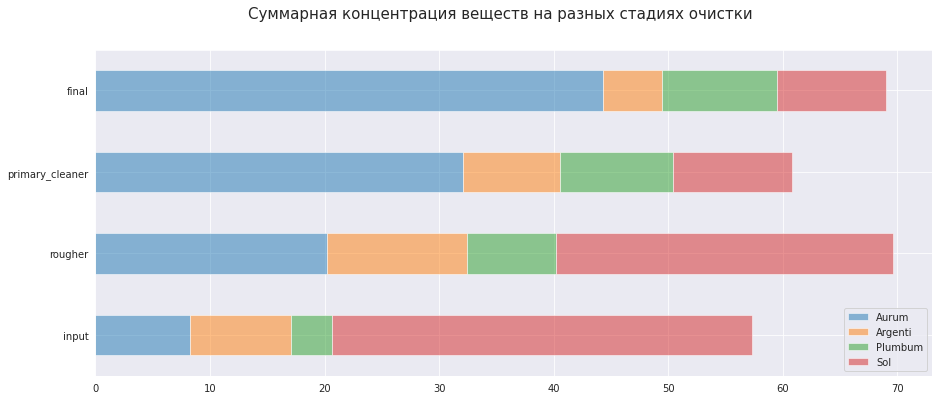

In [41]:

fig, ax = plt.subplots(figsize=(15,6))

table_mean_output_sum.plot.barh(stacked=True, alpha=0.5, ax=ax)

fig.suptitle('Суммарная концентрация веществ на разных стадиях очистки', fontsize = 15)

plt.show()

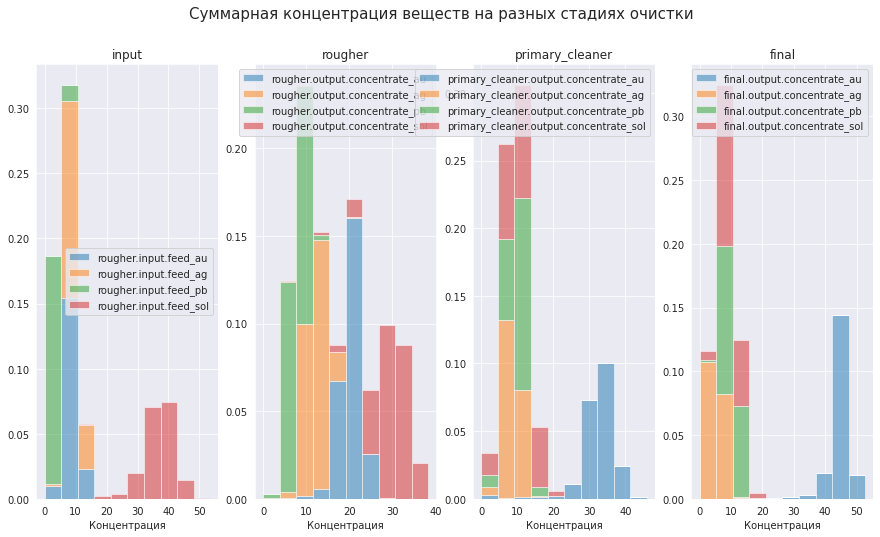

In [42]:
histogram_of_densities_input = full[[
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol'
    ]]

histogram_of_densities_rougher = full[[
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol'
]]

histogram_of_densities_primary_cleaner = full[[
    'primary_cleaner.output.concentrate_au',
    'primary_cleaner.output.concentrate_ag',
    'primary_cleaner.output.concentrate_pb',
    'primary_cleaner.output.concentrate_sol'
]]

histogram_of_densities_final = full[[
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol'
]]

fig, ax = plt.subplots(1, 4, figsize=(15,8))

histogram_of_densities_input.plot.hist(density=True, stacked=True, alpha=0.5, ax=ax[0])
histogram_of_densities_rougher.plot.hist(density=True, stacked=True, alpha=0.5, ax=ax[1])
histogram_of_densities_primary_cleaner.plot.hist(density=True, stacked=True, alpha=0.5, ax=ax[2])
histogram_of_densities_final.plot.hist(density=True, stacked=True, alpha=0.5, ax=ax[3])

fig.suptitle('Суммарная концентрация веществ на разных стадиях очистки', fontsize = 15)

ax[0].set(title='input', xlabel = 'Концентрация', ylabel = '')
ax[1].set(title='rougher', xlabel = 'Концентрация', ylabel = '')
ax[2].set(title='primary_cleaner', xlabel = 'Концентрация', ylabel = '')
ax[3].set(title='final', xlabel = 'Концентрация', ylabel = '')

plt.show()

**Вывод**

На графике выше хорошо видна обратная зависимость содержания солей и золота на разных степенях очистки золота. Так с каждым шагом концентрация золота увеличивается, содержание солей, в свою очередь уменьшается. Серебро и свинец так сильно не меняют свою концентрацию как золото и соли.

## Модель

Построение модели начнем с объявления функции sMAPE, которая будет являтся метрикой качества.

### Объявление функции для расчета sMAPE

In [43]:
def smape(target, predict):
    predict = pd.Series(predict)
    numerator = abs(target - predict)
    denominator = (abs(target) + abs(predict)) / 2
    error = np.mean(numerator / denominator) * 100
    
    return error
smape_score = make_scorer(smape, greater_is_better=False)

In [44]:
def total_smape(rogher_target, rogher_predict, final_target, final_predict):
    smape_rogher = smape(rogher_target, rogher_predict)
    smape_final = smape(final_target, final_predict)
    total_smaper = 0.25 * smape_rogher + 0.75 * smape_final
    return total_smaper

In [45]:
target_values = [36, 35]
predict_values = [36, 34]
target_t = pd.Series(data=target_values) 
predict_t = pd.Series(data=predict_values) 
total_smape(target_t, predict_t, target_t, predict_t)

1.4492753623188406

In [46]:
target_values = [36, 101]
predict_values = [36, 35]
target_t = pd.Series(data=target_values) 
predict_t = pd.Series(data=predict_values) 
smape(target_t, predict_t)

48.529411764705884

### Обучение и оценка качества моделей

Разобьем обучающую выборку на две части - для предсказания эффективности обогащения грубой очистки и финальной.

In [47]:
rougher_features_train = train[[
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_rate',
    'rougher.input.feed_size',
    'rougher.input.feed_sol',
    'rougher.input.feed_au',
    'rougher.input.floatbank10_sulfate',
    'rougher.input.floatbank10_xanthate',
    'rougher.input.floatbank11_sulfate',
    'rougher.input.floatbank11_xanthate',
    'rougher.state.floatbank10_a_air',
    'rougher.state.floatbank10_a_level',
    'rougher.state.floatbank10_b_air',
    'rougher.state.floatbank10_b_level',
    'rougher.state.floatbank10_c_air',
    'rougher.state.floatbank10_c_level',
    'rougher.state.floatbank10_d_air',
    'rougher.state.floatbank10_d_level',
    'rougher.state.floatbank10_e_air',
    'rougher.state.floatbank10_e_level',
    'rougher.state.floatbank10_f_air',
    'rougher.state.floatbank10_f_level']].reset_index(drop=True)

final_features_train = train.drop(columns=changes, axis=1).reset_index(drop=True)
final_features_train = final_features_train.drop(columns='date', axis=1).reset_index(drop=True)
rougher_target_train = train['rougher.output.recovery'].reset_index(drop=True)
final_target_train = train['final.output.recovery'].reset_index(drop=True)

In [48]:
rougher_features_train.isna().sum()

rougher.input.feed_ag                 0
rougher.input.feed_pb                 0
rougher.input.feed_rate               0
rougher.input.feed_size               0
rougher.input.feed_sol                0
rougher.input.feed_au                 0
rougher.input.floatbank10_sulfate     0
rougher.input.floatbank10_xanthate    0
rougher.input.floatbank11_sulfate     0
rougher.input.floatbank11_xanthate    0
rougher.state.floatbank10_a_air       0
rougher.state.floatbank10_a_level     0
rougher.state.floatbank10_b_air       0
rougher.state.floatbank10_b_level     0
rougher.state.floatbank10_c_air       0
rougher.state.floatbank10_c_level     0
rougher.state.floatbank10_d_air       0
rougher.state.floatbank10_d_level     0
rougher.state.floatbank10_e_air       0
rougher.state.floatbank10_e_level     0
rougher.state.floatbank10_f_air       0
rougher.state.floatbank10_f_level     0
dtype: int64

Обучим модель линейной регрессии.

In [49]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(rougher_features_train, rougher_target_train)
predict = pd.Series(model_linear_regression.predict(rougher_features_train))
smape_score(model_linear_regression, rougher_features_train, rougher_target_train)

-5.139373658584761

Обучим модель дерева решений.

In [50]:
model_tree = DecisionTreeRegressor(random_state=12345)
model_tree.fit(rougher_features_train, rougher_target_train)
display('sMAPE дерева решений:{:}'.format(smape_score(model_tree, rougher_features_train, rougher_target_train)))

'sMAPE дерева решений:-0.0'

Обучим модель случайного леса.

In [51]:
model_forest = RandomForestRegressor(random_state=12345)
model_forest.fit(rougher_features_train, rougher_target_train)
display('sMAPE случайного леса:{:}'.format(smape_score(model_forest, rougher_features_train, rougher_target_train)))

'sMAPE случайного леса:-1.037115018804822'

Оценим качество моделей кросс-валидацией.

In [52]:
scores = []

sample_size = int(len(train)/5)

for i in range(0, len(train), sample_size):
    
    valid_indexes = list(range(i, sample_size+i))
    
    if i == 0:
        train_indexes = list(range(valid_indexes[-1]+1, len(train)))
    else: 
        train_indexes = list(range(0, i)) + list(range(valid_indexes[-1]+1, len(train)))
                                    
    features_valid = rougher_features_train.drop(index=train_indexes)
    target_valid = rougher_target_train.drop(index=train_indexes)
    
    predict = model_linear_regression.predict(features_valid)
    score = smape(target_valid.reset_index(drop=True), predict)
    
    scores.append(score)

final_score = (sum(scores))/len(scores)  
display(f'sMAPE линейной регрессии: {final_score:.3f}%.' )

'sMAPE линейной регрессии: 5.139%.'

In [53]:
scores = []

sample_size = int(len(train)/5)

for i in range(0, len(train), sample_size):
    
    valid_indexes = list(range(i, sample_size+i))
    
    if i == 0:
        train_indexes = list(range(valid_indexes[-1]+1, len(train)))
    else: 
        train_indexes = list(range(0, i)) + list(range(valid_indexes[-1]+1, len(train)))
                                    
    features_valid = rougher_features_train.drop(index=train_indexes)
    target_valid = rougher_target_train.drop(index=train_indexes)
    
    predict = model_tree.predict(features_valid)
    score = smape(target_valid.reset_index(drop=True), predict)
    
    scores.append(score)

final_score = (sum(scores))/len(scores)  
display(f'sMAPE дерева решений: {final_score:.3f}%.' )

'sMAPE дерева решений: 0.000%.'

In [54]:
scores = []

sample_size = int(len(train)/5)

for i in range(0, len(train), sample_size):
    
    valid_indexes = list(range(i, sample_size+i))
    
    if i == 0:
        train_indexes = list(range(valid_indexes[-1]+1, len(train)))
    else: 
        train_indexes = list(range(0, i)) + list(range(valid_indexes[-1]+1, len(train)))
                                    
    features_valid = rougher_features_train.drop(index=train_indexes)
    target_valid = rougher_target_train.drop(index=train_indexes)
    
    predict = model_forest.predict(features_valid)
    score = smape(target_valid.reset_index(drop=True), predict)
    
    scores.append(score)

final_score = (sum(scores))/len(scores)  
display(f'sMAPE случайного леса: {final_score:.3f}%.' )

'sMAPE случайного леса: 1.037%.'

**Вывод**

На этапе грубой очистки пока лидирует модель дерева решений, так как у нее наименьшая ошибка. Возможно модель переучилась, что проверим на этапе теста.

Повторим обучение для финальной очистки.

In [55]:
model_linear_regression_final = LinearRegression()
model_linear_regression_final.fit(final_features_train, final_target_train)
predict = pd.Series(model_linear_regression_final.predict(final_features_train))
display(f'sMAPE линейной регрессии: {smape(final_target_train, predict):.2f}%.' )

'sMAPE линейной регрессии: 8.11%.'

In [56]:
model_tree_final = DecisionTreeRegressor(random_state=12345)
model_tree_final.fit(final_features_train, final_target_train)
predict_tree = pd.Series(model_tree_final.predict(final_features_train))
display(f'sMAPE дерева решений: {smape(final_target_train, predict_tree):.2f}%.')

'sMAPE дерева решений: 0.00%.'

In [57]:
model_forest_final = RandomForestRegressor(random_state=12345)
model_forest_final.fit(final_features_train, final_target_train)
predict_forest = pd.Series(model_forest_final.predict(final_features_train))
display(f'sMAPE случайный лес: {smape(final_target_train, predict_forest):.2f}%.')

'sMAPE случайный лес: 2.19%.'

Проверим модели кросс-валидацией.

In [58]:
scores = []

sample_size = int(len(train)/5)

for i in range(0, len(train), sample_size):
    
    valid_indexes = list(range(i, sample_size+i))
    
    if i == 0:
        train_indexes = list(range(valid_indexes[-1]+1, len(train)))
    else: 
        train_indexes = list(range(0, i)) + list(range(valid_indexes[-1]+1, len(train)))
                                    
    features_valid = final_features_train.drop(index=train_indexes)
    target_valid = final_target_train.drop(index=train_indexes)
    
    predict = model_linear_regression_final.predict(features_valid)
    score = smape(target_valid.reset_index(drop=True), predict)
    
    scores.append(score)

final_score = (sum(scores))/len(scores)  
display(f'sMAPE линейной регрессии: {final_score:.3f}%.' )

'sMAPE линейной регрессии: 8.107%.'

In [59]:
scores = []

sample_size = int(len(train)/5)

for i in range(0, len(train), sample_size):
    
    valid_indexes = list(range(i, sample_size+i))
    
    if i == 0:
        train_indexes = list(range(valid_indexes[-1]+1, len(train)))
    else: 
        train_indexes = list(range(0, i)) + list(range(valid_indexes[-1]+1, len(train)))
                                    
    features_valid = final_features_train.drop(index=train_indexes)
    target_valid = final_target_train.drop(index=train_indexes)
    
    predict = model_tree_final.predict(features_valid)
    score = smape(target_valid.reset_index(drop=True), predict)
    
    scores.append(score)

final_score = (sum(scores))/len(scores)  
display(f'sMAPE дерева решений: {final_score:.3f}%.' )

'sMAPE дерева решений: 0.000%.'

In [60]:
scores = []

sample_size = int(len(train)/5)

for i in range(0, len(train), sample_size):
    
    valid_indexes = list(range(i, sample_size+i))
    
    if i == 0:
        train_indexes = list(range(valid_indexes[-1]+1, len(train)))
    else: 
        train_indexes = list(range(0, i)) + list(range(valid_indexes[-1]+1, len(train)))
                                    
    features_valid = final_features_train.drop(index=train_indexes)
    target_valid = final_target_train.drop(index=train_indexes)
    
    predict = model_forest_final.predict(features_valid)
    score = smape(target_valid.reset_index(drop=True), predict)
    
    scores.append(score)

final_score = (sum(scores))/len(scores)  
display(f'sMAPE случайного леса: {final_score:.3f}%.' )

'sMAPE случайного леса: 2.187%.'

На предстказании для финальной очистки лидирует также дерево решений. Проверим модели на тестовой сборке.

In [61]:
rougher_features_test = test[[
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_rate',
    'rougher.input.feed_size',
    'rougher.input.feed_sol',
    'rougher.input.feed_au',
    'rougher.input.floatbank10_sulfate',
    'rougher.input.floatbank10_xanthate',
    'rougher.input.floatbank11_sulfate',
    'rougher.input.floatbank11_xanthate',
    'rougher.state.floatbank10_a_air',
    'rougher.state.floatbank10_a_level',
    'rougher.state.floatbank10_b_air',
    'rougher.state.floatbank10_b_level',
    'rougher.state.floatbank10_c_air',
    'rougher.state.floatbank10_c_level',
    'rougher.state.floatbank10_d_air',
    'rougher.state.floatbank10_d_level',
    'rougher.state.floatbank10_e_air',
    'rougher.state.floatbank10_e_level',
    'rougher.state.floatbank10_f_air',
    'rougher.state.floatbank10_f_level']].reset_index(drop=True)

final_features_test = test.drop(columns='date', axis=1).reset_index(drop=True)

rougher_target_test = test_target['rougher.output.recovery'].reset_index(drop=True)
final_target_test = test_target['final.output.recovery'].reset_index(drop=True)

In [62]:
predict_rougher_linear = pd.Series(model_linear_regression.predict(rougher_features_test))
display(f'sMAPE линейной регрессии: {smape(rougher_target_test, predict_rougher_linear):.2f}%.' )

'sMAPE линейной регрессии: 4.49%.'

In [63]:
predict_rougher_tree = pd.Series(model_tree.predict(rougher_features_test))
display(f'sMAPE дерева решений: {smape(rougher_target_test, predict_rougher_tree):.2f}%.' )

'sMAPE дерева решений: 7.44%.'

In [64]:
predict_rougher_forest = pd.Series(model_forest.predict(rougher_features_test))
display(f'sMAPE случайного леса: {smape(rougher_target_test, predict_rougher_forest):.2f}%.' )

'sMAPE случайного леса: 4.44%.'

In [65]:
predict_final_linear = pd.Series(model_linear_regression_final.predict(final_features_test))
display(f'sMAPE линейной регрессии: {smape(final_target_test, predict_final_linear):.2f}%.' )

'sMAPE линейной регрессии: 8.50%.'

In [66]:
predict_final_tree = pd.Series(model_tree_final.predict(final_features_test))
display(f'sMAPE дерева решений: {smape(final_target_test, predict_final_tree):.2f}%.' )

'sMAPE дерева решений: 12.61%.'

In [67]:
predict_final_forest = pd.Series(model_forest_final.predict(final_features_test))
display(f'sMAPE случайного леса: {smape(final_target_test, predict_final_forest):.2f}%.' )

'sMAPE случайного леса: 8.14%.'

In [68]:
display(f'Итовое sMAPE: {total_smape(rougher_target_test, predict_rougher_forest, final_target_test, predict_final_forest):.2f}%.' )

'Итовое sMAPE: 7.22%.'

**Вывод**

Итогом нашего проекта можно признать обученные модели линейной регрессии, дерева решений и случайного леса. На тестовой выборке лучше всего себя показывают модели случайного леса как на предсказании эффективности грубой очистки, так и на предсказании финальной очистки. Можно конечно еще попробовать поиграть с гиперпараметрами или попробовать обучить градиентный бустинг, но считаю, что наши две модели случайного леса справляются прекрасно со своей работой.